In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Question 1

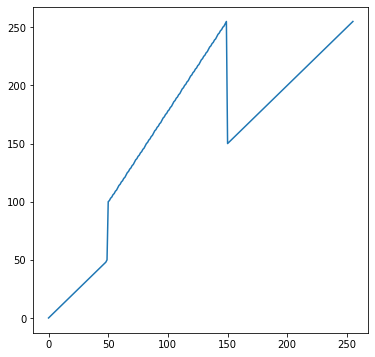

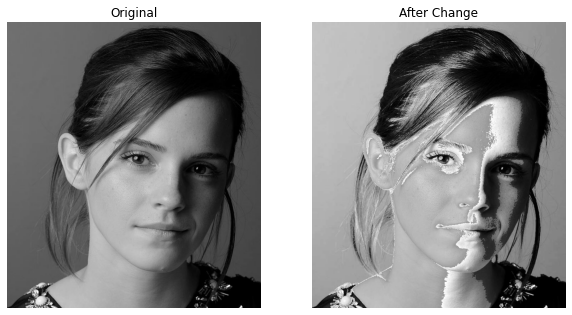

In [10]:
emma = cv.imread(r'images/emma_gray.jpg')
assert emma is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

table = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(table)

assert len(table)==256

output_emma = cv.LUT(emma,table)

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(cv.cvtColor(emma,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Original')
ax[1].imshow(cv.cvtColor(output_emma,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('After Change')